## SVM실습

### 필요 패키지 호출


In [128]:
# 데이터 구성: Sereis, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할: train, test
from sklearn.model_selection import train_test_split
# 분류 SVM
from sklearn.svm import SVC
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 분류모델 평가함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

### 폰트 적용

In [129]:
# 그래픽 한글폰트 적용
matplotlib.rc("font", family = "AppleGothic")
# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

### 데이터 불러오기

In [130]:
df_raw = pd.read_csv('/Users/2circlejun/Desktop/포스텍/과제/빅데이터/실습화일/2. Big Data 분석/유방암.csv', encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


### 이상치 확인


In [131]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

### 데이터 기술통계량 및 형태 파악

In [132]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

#### 모든 데이터에 결측값이 존재하지 않고 데이터 타입도 float으로 통일되어있다.

In [133]:
df_raw.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,...,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,15.709703,20.323250,103.050469,807.735937,0.099358,0.123252,0.122144,0.066977,0.186772,0.062679,...,18.542406,27.225594,123.221625,1133.463438,0.137678,0.308713,0.352927,0.145487,0.305097,0.087156
std,3.745788,4.150729,25.835984,391.969297,0.014249,0.057207,0.084822,0.041732,0.027485,0.007190,...,5.182210,6.050052,35.960154,640.979627,0.023316,0.175225,0.214449,0.067292,0.069367,0.020076
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.026750,0.000000,0.000000,0.127400,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.085670,0.050360,0.000000,0.000000,0.156500,0.055040
25%,13.050000,17.460000,84.845000,523.900000,0.090240,0.081132,0.052770,0.029538,0.166900,0.057450,...,14.657500,23.275000,95.525000,653.525000,0.122675,0.180275,0.182950,0.090868,0.258700,0.073475
50%,15.125000,20.215000,100.100000,713.050000,0.098570,0.115300,0.110850,0.065265,0.184650,0.061445,...,17.730000,26.880000,118.850000,969.200000,0.138050,0.276950,0.339750,0.152700,0.295800,0.082640
75%,18.520000,22.500000,121.550000,1075.250000,0.108050,0.155650,0.169550,0.091777,0.202700,0.066705,...,22.420000,30.937500,148.850000,1538.500000,0.151200,0.405675,0.483675,0.197100,0.328125,0.097745
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


#### 유방암 양성 음성 비율

In [134]:
df_raw.diagnosis.value_counts(normalize = True)

음성    0.6625
양성    0.3375
Name: diagnosis, dtype: float64

#### 양성 1, 음성 0으로 변환하는 함수 작성

In [135]:
def diag(x):
    if x == "음성":
        return 0
    else:
        return 1

In [136]:
# diagnosis열이 '음성', '양성' 을 정수에 대입시켜 변환시켜준다
df_raw['diagnosis'] = df_raw['diagnosis'].apply(diag)
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


#### 데이터 분할

- 문제에 명시된 대로 train/ test dataset을 6:4로 나눠준다

In [137]:
df_raw_x = df_raw.drop('diagnosis', axis= 1, inplace= False)
df_raw_y = df_raw['diagnosis']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size= 0.4, random_state=1234)

In [138]:
print(df_train_x.shape)
print(df_train_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(192, 30)
(192,)
(128, 30)
(128,)


#### SVM모델 생성

In [139]:
# 모델 생성
svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 정확도 
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.885
Accuracy on test set: 0.891


#### SVM모델의 hyper parameter 

In [140]:
svm_uncustomized.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 1234,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#### Cost 변경에 따른 모델 성능

In [141]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

# c: 규제(0.01,0.1,1,10,100)
para_c = [10 ** c for c in range(-2, 3)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 결과 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy
# C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.599,0.758
1,0.10,0.854,0.859
2,1.00,0.885,0.891
3,10.00,0.906,0.922
4,100.00,0.927,0.930


C는 cost를 의미하며, 얼마나 많은 데이터가 다른 클래스에 놓이는 것을 허용하는지 결정한다.   
C가 클수록(오류를 적게허용) 과적합 되는 것을 볼 수 있다.

#### 그래프로 표현

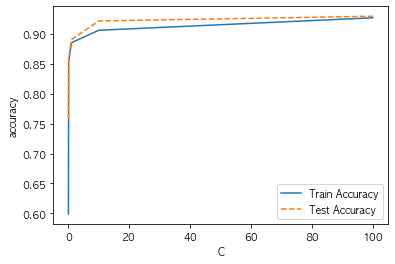

In [142]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_c,test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.xlabel("C"); plt.ylabel("accuracy")
plt.legend()

C가 커질수록 과적합 되는 것이므로 train test 성능의 간극이 작은 0.01로 cost를 설정한다.

#### Gamma 변경에 따른 모델 성능

In [143]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

# gamma: 규제(0.01,0.1,1,10)
para_gamma = [10 ** gamma for gamma in range(-2, 2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 결과 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy
# Gamma별 정확도 테이블
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,1.0,0.781
1,0.10,1.0,0.766
2,1.00,1.0,0.766
3,10.00,1.0,0.766


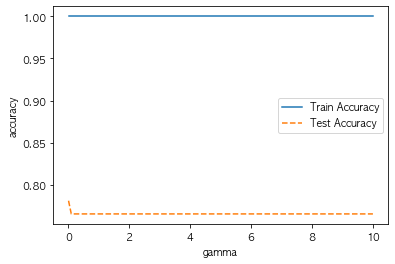

In [144]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_gamma,test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.xlabel("gamma"); plt.ylabel("accuracy")
plt.legend()

- Gamma는 kernel의 최적화를 도와주는 파라미터로 하나의 데이터가 동일한 클래스로 분류되게 하려는 영향력의 거리를 뜻한다.

- 하지만 변수 스케일링이 진행되지 않아서 그래프의 차이가 없는 것으로 보인다.   따라서 스케일링을 진행한다.

#### 변수 스케일링

In [145]:
# 변수명 저장
v_feature_name = df_train_x.columns
# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


- y값(목표변수)은 굳이 scaling을 진행할 필요가 없기 때문에 재사용한다.

In [148]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size=0.4, random_state=1234)

print("train data size : {}".format(df_scaled_train_x.shape))
print("test data size : {}".format(df_scaled_test_x.shape))

train data size : (192, 30)
test data size : (128, 30)


변수 스케일링이 잘 완료되었고, data 비율에도 문제가 없는 것으로 보인다.

#### 스케일링 후 모델 재실행

In [149]:
# 모델 생성
svm_scaled = SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)

# Train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
# Test 데이터 정확도 
print("Accuracy on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.995
Accuracy on test set: 0.961


스케일링 후 모델의 성능이 향상된 것을 알 수 있다.

#### cost 변경에 따른 모델 성능

In [150]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

# c: 규제(0.1~2.0)
para_c = [c*0.1 for c in range(1, 21)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 결과 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy
# C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.1,0.964,0.906
1,0.2,0.969,0.930
2,0.3,0.974,0.930
3,0.4,0.979,0.938
4,0.5,0.984,0.930
5,0.6,0.995,0.938
6,0.7,0.995,0.945
7,0.8,0.995,0.953
8,0.9,0.995,0.953
9,1.0,0.995,0.961


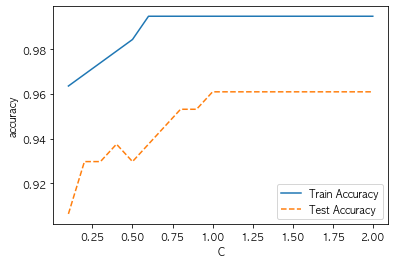

In [151]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_c,test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.xlabel("C"); plt.ylabel("accuracy")
plt.legend()

# C = 1.3

- train test 폭이 작은 0.4로 결정한다 

#### gamma 변경에 따른 모델 성능

In [154]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

# para_gamma = [10**gamma for gamma in range(-2,2)]
para_gamma = [0.05*gamma for gamma in range(1, 15)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.4, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 결과 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy
# Gamma별 정확도 테이블
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.05,0.974,0.930
1,0.10,0.964,0.898
2,0.15,0.964,0.891
3,0.20,0.958,0.867
4,0.25,0.938,0.859
5,0.30,0.901,0.852
6,0.35,0.865,0.852
7,0.40,0.802,0.812
8,0.45,0.766,0.789
9,0.50,0.729,0.773


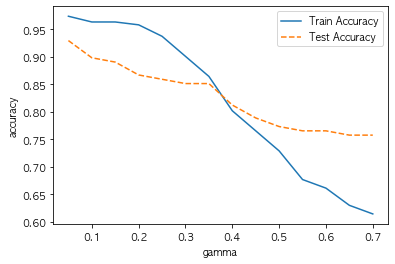

In [155]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_gamma,test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.xlabel("gamma"); plt.ylabel("accuracy")
plt.legend()



train test 데이터셋의 차이가 적은 0.4로 설정한다.

In [156]:
# 최종 모델
svc_final = SVC(gamma = 0.4, C = 0.4, random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)
# train 모델 정확도
print("Accuracy on training set: {0:.3f}".format(svc_final.score(df_scaled_train_x, df_train_y)))
# test 모델 정확도
print("Accuracy on test set: {0:.3f}".format(svc_final.score(df_scaled_test_x, df_test_y)))
# Confusion Matrix
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)), "\n")
# 목표변수의 빈도 불균형: f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits = 3))

Accuracy on training set: 0.802
Accuracy on test set: 0.812
Confusion Matrix: 
[[97  0]
 [24  7]] 

              precision    recall  f1-score   support

           0      0.802     1.000     0.890        97
           1      1.000     0.226     0.368        31

    accuracy                          0.812       128
   macro avg      0.901     0.613     0.629       128
weighted avg      0.850     0.812     0.764       128



양성에 대한 recall이 매우 낮은 것을 확인할 수 있다.

#### gridsearch 진행

In [157]:
import warnings
warnings.filterwarnings("ignore")

estimator = SVC(random_state = 1234)

# 구하고자 하는 parameter와 범위
param_grid= {"C" : para_c, "gamma" : para_gamma}

# 설명력이 높은 최적 parameter 찾기
grid_svc = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_svc.fit(df_scaled_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_svc.best_estimator_))
print("\nbest parameter: \n{}".format(grid_svc.best_params_))
print("\nbest score: \n{}".format(grid_svc.best_score_.round(3)))

best estimator model: 
SVC(C=0.1, gamma=0.05, random_state=1234)

best parameter: 
{'C': 0.1, 'gamma': 0.05}

best score: 
0.958


Grid search 결과 c 0.1, gamma 0.05인 경우의 성능이 가장 뛰어났다.   
이에 따라 다시 최종 모델을 설정한다.

In [158]:
# 최종 모델
svc_final = SVC(gamma = 0.05, C = 0.1, random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)
# train 모델 정확도
print("Accuracy on training set: {0:.3f}".format(svc_final.score(df_scaled_train_x, df_train_y)))
# test 모델 정확도
print("Accuracy on test set: {0:.3f}".format(svc_final.score(df_scaled_test_x, df_test_y)))
# Confusion Matrix
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)), "\n")
# 목표변수의 빈도 불균형: f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits = 3))

Accuracy on training set: 0.958
Accuracy on test set: 0.898
Confusion Matrix: 
[[91  6]
 [ 7 24]] 

              precision    recall  f1-score   support

           0      0.929     0.938     0.933        97
           1      0.800     0.774     0.787        31

    accuracy                          0.898       128
   macro avg      0.864     0.856     0.860       128
weighted avg      0.897     0.898     0.898       128



양성에 대한 recall이 매우 높은 것을 알 수 있다.

### 값 예측 및 비교

In [167]:
pred = svc_final.predict(df_scaled)
pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,

In [168]:
(df_raw_y == pred).sum()

299

In [171]:
299/320

0.934375

예측 결과 예측 정확도는 93.43%이다.